<a href="https://colab.research.google.com/github/mhasyimap/Tugas-Pemrograman-Python/blob/main/Tugas_minggu_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
cd /content/drive/MyDrive/Colab Notebooks/Dataset Collection

/content/drive/MyDrive/Colab Notebooks/Dataset Collection


In [48]:
ls

 3scene/  'Gambar daun'/  'My Datasets'/  'Tugas 11'/


In [49]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [50]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Tugas 11")
data = []
labels = []

[INFO] loading images...


In [51]:
for i in imagePaths:
  image = Image.open(i)
  image = np.array(image.resize((64,64))) / 255.0 #normalisasi
  data.append(image)

  label = i.split(os.path.sep)[-2]
  labels.append(label)

In [52]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [53]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [54]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [55]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(147, 64, 64, 3)


In [56]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense
#CNN
model = Sequential()
model.add(Convolution2D(21, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(21, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 21)        588       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 21)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 21)        3990      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 21)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4116)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               411700    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [58]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=30)

[INFO] training network...
Epoch 1/25
15/15 [==============================] - 2s 103ms/step - loss: 1.5810 - accuracy: 0.3128 - val_loss: 1.4541 - val_accuracy: 0.5238
Epoch 2/25
15/15 [==============================] - 1s 98ms/step - loss: 1.3155 - accuracy: 0.5000 - val_loss: 1.1913 - val_accuracy: 0.4830
Epoch 3/25
15/15 [==============================] - 1s 99ms/step - loss: 1.0172 - accuracy: 0.6073 - val_loss: 0.9886 - val_accuracy: 0.5782
Epoch 4/25
15/15 [==============================] - 1s 97ms/step - loss: 0.8616 - accuracy: 0.6712 - val_loss: 0.8008 - val_accuracy: 0.6871
Epoch 5/25
15/15 [==============================] - 1s 96ms/step - loss: 0.8015 - accuracy: 0.6986 - val_loss: 0.8607 - val_accuracy: 0.6395
Epoch 6/25
15/15 [==============================] - 1s 96ms/step - loss: 0.6752 - accuracy: 0.7694 - val_loss: 0.7674 - val_accuracy: 0.6871
Epoch 7/25
15/15 [==============================] - 1s 97ms/step - loss: 0.6235 - accuracy: 0.7945 - val_loss: 0.7769 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


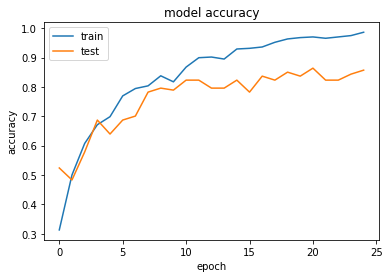

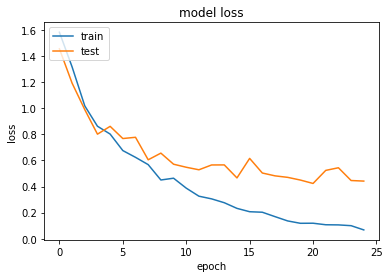

In [59]:
import matplotlib.pyplot as plt

print(H.history.keys())
#accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.87      0.96      0.92        28
      GMB_03       0.90      0.75      0.82        24
      GMB_05       0.82      0.89      0.85        36
      GMB_07       0.80      0.77      0.79        31
      GMB_09       0.93      0.89      0.91        28

    accuracy                           0.86       147
   macro avg       0.86      0.85      0.86       147
weighted avg       0.86      0.86      0.86       147

